##  Sentiment Analysis on Women's E-Commerce Clothing Reviews Using NLP

### Introduction 

Sentiment analysis is a powerful Natural Language Processing (NLP) technique used to determine the emotional tone behind a body of text. Reviews provide valuable insights into customer experiences, preferences, and pain points. 

In this project, we will analyze customer reviews from a women's e-commerce clothing dataset to classify the sentiment of the reviews as positive, negative, or neutral. This analysis can help businesses understand customer satisfaction, identify areas for improvement, and enhance decision-making processes.

### Objective of the Project 

- Clean and preprocess the text data to make it suitable for NLP tasks.

- Perform exploratory data analysis (EDA) to Understand the distribution of ratings, recommended items, and feedback counts.

- Use NLP techniques to classify reviews into positive, negative, or neutral sentiments.

- Provide insights that can help improve product quality, customer service, and marketing strategies.

- Develop and evaluate machine learning models for sentiment prediction and create a reusable sentiment prediction system for new customer reviews.


### Importing Libraries

In [1]:
# Importing all required libraries
import pandas as pd 
import numpy as np 
import re 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Natural Language Processing (NLP) libraries
import nltk  # For text processing
from nltk.corpus import stopwords  # For removing stopwords
from nltk.stem import WordNetLemmatizer  # For lemmatization
from wordcloud import WordCloud

# Machine Learning libraries
from sklearn.feature_extraction.text import TfidfVectorizer  # For feature extraction
from sklearn.preprocessing import LabelEncoder  # For encoding target variables
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.ensemble import RandomForestClassifier  # Random Forest model
from sklearn.svm import SVC  # Support Vector Machine model
from sklearn.metrics import accuracy_score, classification_report  # For model evaluation
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning

# Download necessary NLTK data
nltk.download('stopwords')  # Download stopwords
nltk.download('wordnet')  # Download WordNet for lemmatization

print("All required libraries imported successfully!")

All required libraries imported successfully!


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Load the dataset
df = pd.read_csv(r'C:\Users\DELL\Desktop\DATASETS\Womens Clothing E-Commerce Reviews.csv') 


In [3]:
df.head() # Preview first few rows

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
print(df.info()) # Check for missing values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None


##  Data Preprocessing

We'll clean the text by handling missing values, removing special characters, lowercasing, removing stopwords, tokenizing and lemmatizing.

In [5]:
# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'Title'])

In [6]:
# Check for missing values in the 'Review Text' column

print(df['Review Text'].isnull().sum())

845


In [7]:
# Drop rows with missing 'Review Text'

df = df.dropna(subset=['Review Text'])

In [8]:
# Function to clean and preprocess text

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    
    return text

# Apply preprocessing to the 'Review Text' column
df['Cleaned_Review'] = df['Review Text'].apply(preprocess_text)

# Display the cleaned reviews
print(df[['Review Text', 'Cleaned_Review']].head())


                                         Review Text  \
0  Absolutely wonderful - silky and sexy and comf...   
1  Love this dress!  it's sooo pretty.  i happene...   
2  I had such high hopes for this dress and reall...   
3  I love, love, love this jumpsuit. it's fun, fl...   
4  This shirt is very flattering to all due to th...   

                                      Cleaned_Review  
0        absolutely wonderful silky sexy comfortable  
1  love dress sooo pretty happened find store im ...  
2  high hope dress really wanted work initially o...  
3  love love love jumpsuit fun flirty fabulous ev...  
4  shirt flattering due adjustable front tie perf...  


In [9]:
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Cleaned_Review
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful silky sexy comfortable
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,love dress sooo pretty happened find store im ...
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,high hope dress really wanted work initially o...
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,love love love jumpsuit fun flirty fabulous ev...
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,shirt flattering due adjustable front tie perf...


###  Exploratory Data Analysis (EDA)

### Distribution of Ratings

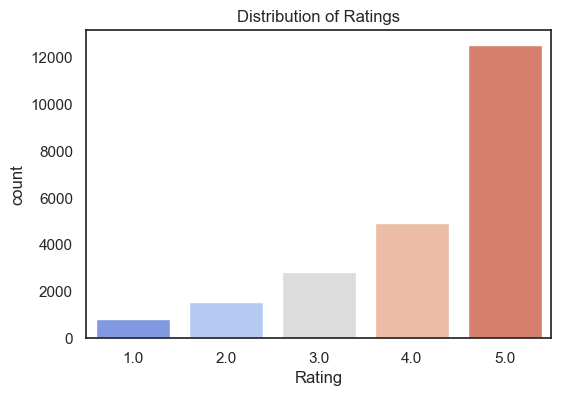

In [35]:
# Exploratory Data Analysis (EDA)
# Set the style to remove gridlines
sns.set_style("white")

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Rating', palette='coolwarm')
plt.title('Distribution of Ratings')
plt.show()

### Distribution of Recommended Items 

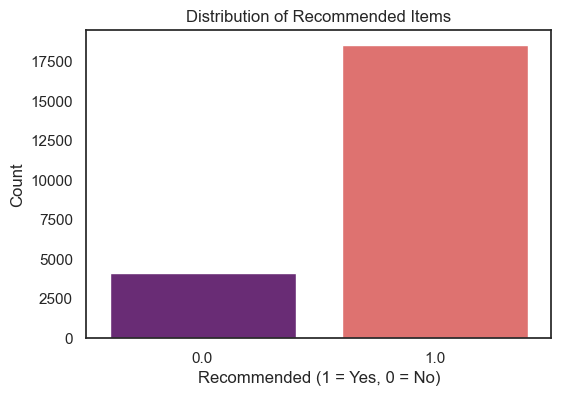

In [36]:
# Distribution of Recommended Items
plt.figure(figsize=(6, 4))
sns.countplot(x='Recommended IND', data=df, palette='magma')
plt.title('Distribution of Recommended Items')
plt.xlabel('Recommended (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

###  Distribution of Positive Feedback Count

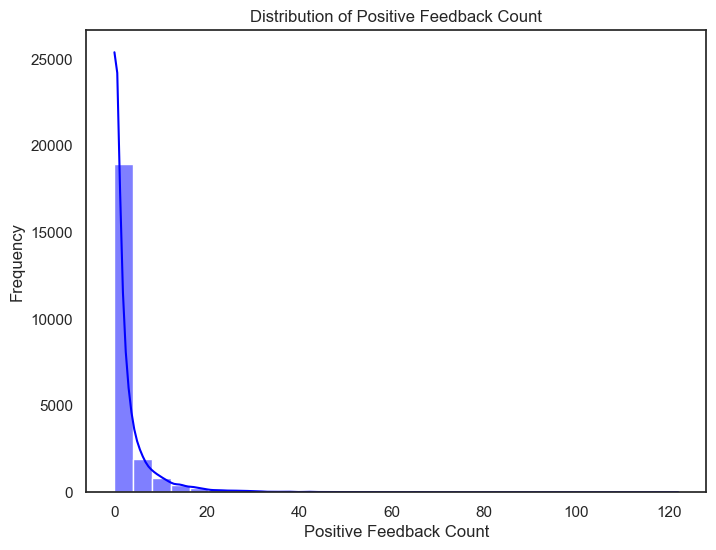

In [37]:
# Distribution of Positive Feedback Count
plt.figure(figsize=(8, 6))
sns.histplot(df['Positive Feedback Count'], bins=30, kde=True, color='blue')
plt.title('Distribution of Positive Feedback Count')
plt.xlabel('Positive Feedback Count')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Function to categorize sentiment

def categorize_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

# Apply function to create sentiment labels
df['Sentiment'] = df['Rating'].apply(categorize_sentiment)


In [15]:
df.head(2)

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Cleaned_Review,Sentiment
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful silky sexy comfortable,Positive
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,love dress sooo pretty happened find store im ...,Positive


In [16]:
df['Sentiment'].value_counts()

Positive    17448
Neutral      2823
Negative     2370
Name: Sentiment, dtype: int64

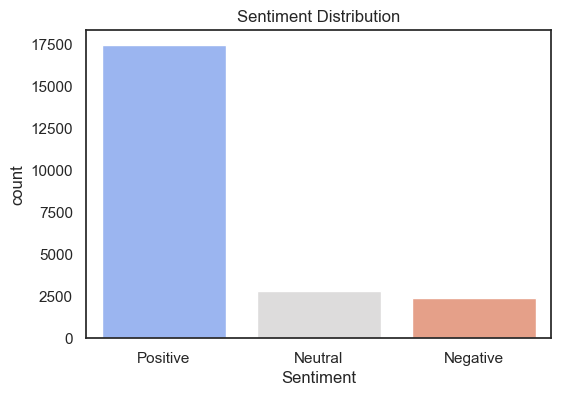

In [38]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sentiment', palette='coolwarm')
plt.title('Sentiment Distribution')
plt.show()

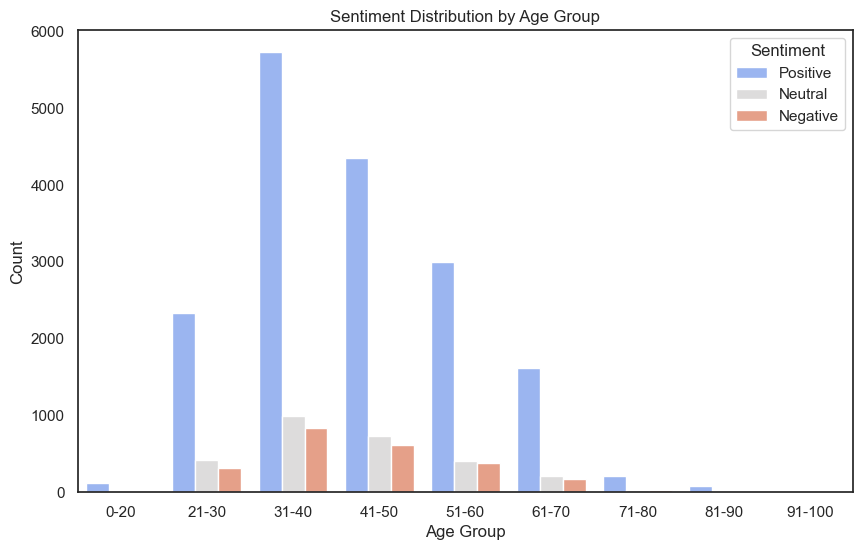

In [51]:
# Sentiment by age

# Add Age Group Bins
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                         labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])

# Plot Sentiment Distribution by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age_Group', hue='Sentiment', palette='coolwarm')
plt.title('Sentiment Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

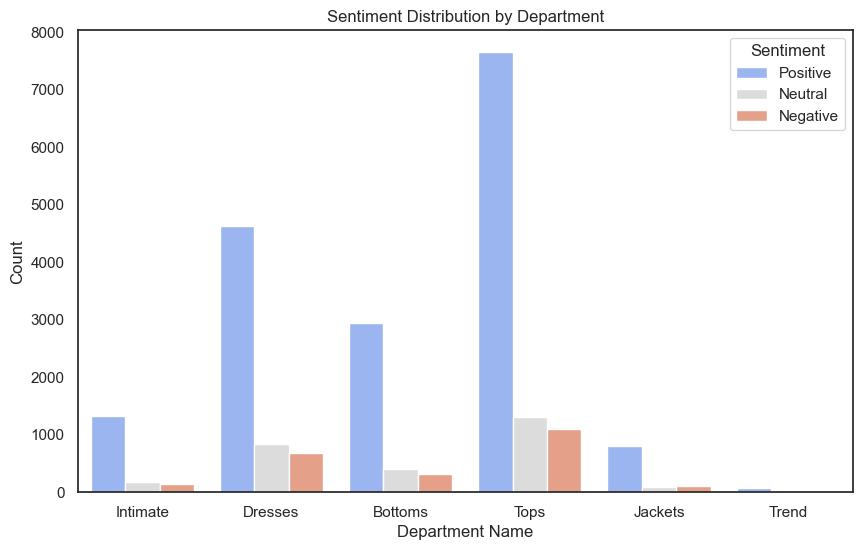

In [52]:
# Plot Sentiment Distribution by Department

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Department Name', hue='Sentiment', palette='coolwarm')
plt.title('Sentiment Distribution by Department')
plt.xlabel('Department Name')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

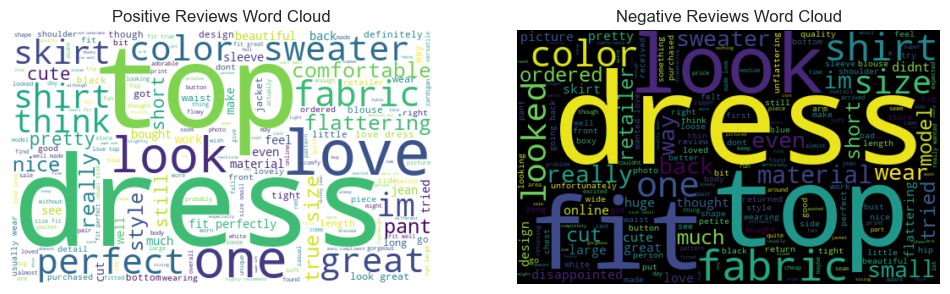

In [18]:
# Word Clouds for Positive and Negative Sentiments

positive_text = ' '.join(df[df['Sentiment'] == 'Positive']['Cleaned_Review'])
negative_text = ' '.join(df[df['Sentiment'] == 'Negative']['Cleaned_Review'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
wordcloud_pos = WordCloud(width=500, height=300, background_color='white').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews Word Cloud")
print()
plt.subplot(1,2,2)
wordcloud_neg = WordCloud(width=500, height=300, background_color='black').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews Word Cloud")
plt.show()

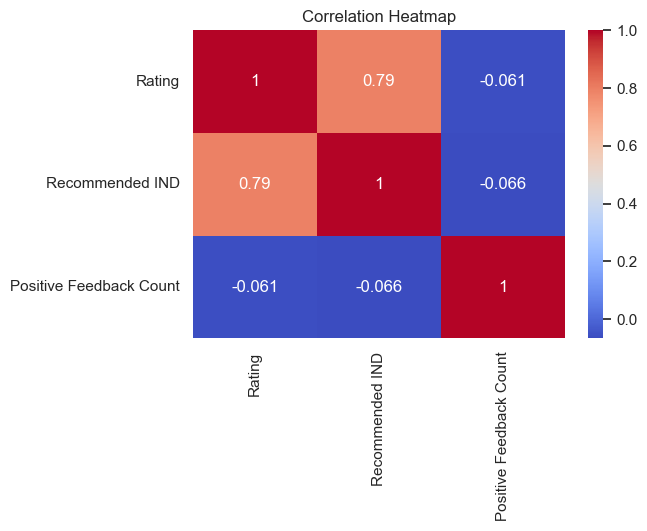

In [19]:
# Correlation between Rating and Recommended IND
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Rating', 'Recommended IND', 'Positive Feedback Count']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Feature Engineering 

In [20]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # You can adjust max_features
X = tfidf.fit_transform(df['Cleaned_Review']).toarray()
y = df['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter for convergence
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Model Evaluation

Accuracy: 0.8200485758445573
Classification Report:
               precision    recall  f1-score   support

    Negative       0.56      0.41      0.48       457
     Neutral       0.49      0.23      0.31       588
    Positive       0.87      0.97      0.92      3484

    accuracy                           0.82      4529
   macro avg       0.64      0.54      0.57      4529
weighted avg       0.79      0.82      0.79      4529



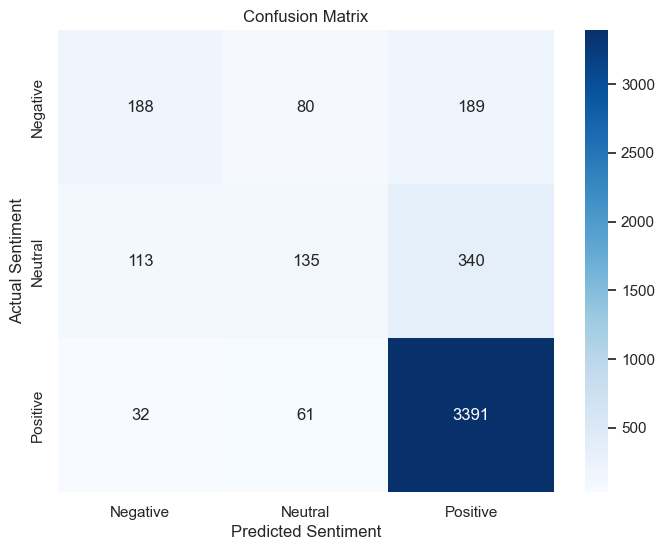

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the Confusion Matrix using a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.show()

To improving the performance of the model, especially for minority classes like Negative and Neutral,  we will carry out more feature engineering, by incorporating additional features like word embeddings (e.g., Word2Vec, GloVe) or sentiment scores (e.g., VADER, TextBlob).

###  Sentiment Scores Using VADER

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool specifically designed for social media text. It provides a sentiment score between -1 (negative) and +1 (positive).

In [22]:
!pip install vaderSentiment

In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']  # Use the compound score for overall sentiment

# Add sentiment scores as a new feature
df['Sentiment_Score'] = df['Cleaned_Review'].apply(get_sentiment_scores)

# Display the new feature
print(df[['Cleaned_Review', 'Sentiment_Score']].head())

                                      Cleaned_Review  Sentiment_Score
0        absolutely wonderful silky sexy comfortable           0.8991
1  love dress sooo pretty happened find store im ...           0.9710
2  high hope dress really wanted work initially o...           0.9081
3  love love love jumpsuit fun flirty fabulous ev...           0.9437
4  shirt flattering due adjustable front tie perf...           0.9062


###  Word Embeddings Using Word2Vec

Word2Vec is a popular word embedding technique that represents words as vectors in a high-dimensional space. We can use the average of word vectors for each review as a feature.

### Step 1: Train a Word2Vec Model 

In [24]:
from gensim.models import Word2Vec

# Tokenize the cleaned reviews
tokenized_reviews = [review.split() for review in df['Cleaned_Review']]

# Train a Word2Vec model
word2vec_model = Word2Vec(tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Save the model for future use
word2vec_model.save("word2vec.model")

### Step 2: Generate Word Embeddings for Reviews 

In [25]:
import numpy as np

# Function to get the average word vector for a review
def get_average_word2vec(review, model):
    words = review.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

# Generate Word2Vec features for each review
word2vec_features = np.array([get_average_word2vec(review, word2vec_model) for review in df['Cleaned_Review']])

# Add Word2Vec features to the dataset
word2vec_columns = [f'Word2Vec_{i}' for i in range(word2vec_model.vector_size)]
df_word2vec = pd.DataFrame(word2vec_features, columns=word2vec_columns)
df = pd.concat([df, df_word2vec], axis=1)

# Display the new features
print(df[word2vec_columns].head())

   Word2Vec_0  Word2Vec_1  Word2Vec_2  Word2Vec_3  Word2Vec_4  Word2Vec_5  \
0   -0.361854   -0.247510    0.231100    0.306175   -0.319936   -0.665264   
1   -0.198105    0.068867    0.124002   -0.547120    0.266306   -0.716698   
2   -0.430490    0.071513    0.145749   -0.052001    0.126259   -0.363361   
3   -0.556162    0.504257   -0.086035    0.007907    0.107523   -0.877048   
4   -0.409075    0.422374    0.066973    0.346837   -0.125745   -0.355697   

   Word2Vec_6  Word2Vec_7  Word2Vec_8  Word2Vec_9  ...  Word2Vec_90  \
0    0.241103    0.857821   -0.286819   -0.235002  ...     1.162602   
1   -0.497548    0.633449   -0.113182   -0.557837  ...     0.383201   
2   -0.459845    0.174673   -0.297034   -0.314802  ...     0.796152   
3   -0.040572    0.588732   -0.715379   -0.513149  ...     0.630402   
4   -0.003970    0.631222   -0.329095    0.025531  ...     0.763462   

   Word2Vec_91  Word2Vec_92  Word2Vec_93  Word2Vec_94  Word2Vec_95  \
0    -0.049613     0.570500     0.142329

In [26]:
print(df['Cleaned_Review'].isnull().sum())

822


In [27]:
df = df.dropna(subset=['Cleaned_Review'])

In [28]:
print(df['Cleaned_Review'].isnull().sum())

0


##  Combine Features and Train the Model

### Combine TF-IDF, Sentiment Scores, and Word2Vec Features  

In [29]:
from scipy.sparse import hstack

# TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['Cleaned_Review'])

# Sentiment scores
X_sentiment = df['Sentiment_Score'].values.reshape(-1, 1)

# Word2Vec features
X_word2vec = df[word2vec_columns].values

# Combine all features
X_combined = hstack([X_tfidf, X_sentiment, X_word2vec])

# Target variable
y = df['Sentiment']

###  Train the Model

In [43]:


# Split the Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Train the Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)





LogisticRegression(max_iter=1000)

###  Model Evaluation

Accuracy: 0.8196069772576727
Classification Report:
               precision    recall  f1-score   support

    Negative       0.56      0.44      0.49       457
     Neutral       0.48      0.24      0.32       588
    Positive       0.87      0.97      0.92      3484

    accuracy                           0.82      4529
   macro avg       0.64      0.55      0.58      4529
weighted avg       0.79      0.82      0.80      4529



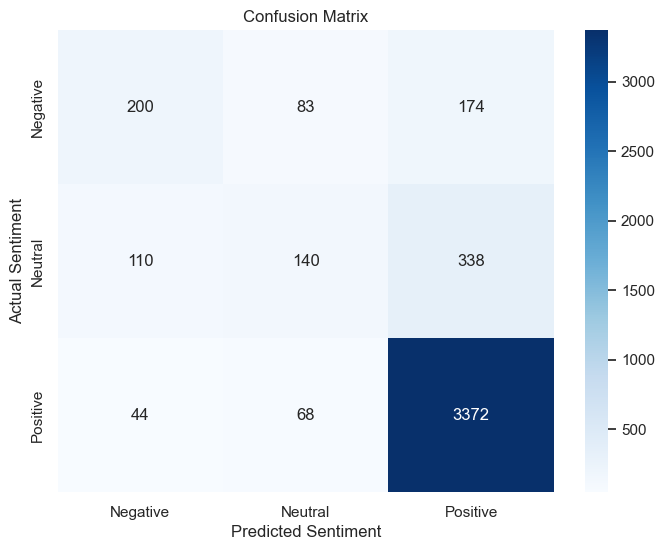

In [39]:
# Evaluate the Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.show()

### Save the Pre-trained Model and Make Prediction

In [46]:
import numpy as np
import joblib
from scipy.sparse import hstack, csr_matrix

def predict_sentiment(new_review):
    # Load models and get dimensions
    model = joblib.load('sentiment_model.pkl')
    tfidf = joblib.load('tfidf_vectorizer.pkl')
    word2vec_model = joblib.load('word2vec_model.pkl')
    expected_features = model.n_features_in_
    expected_tfidf_features = expected_features - joblib.load('num_word2vec_features.pkl')
    
    # Preprocess and extract features
    cleaned_review = preprocess_text(new_review)
    tfidf_features = tfidf.transform([cleaned_review])
    
    # Resize TF-IDF features if needed
    if tfidf_features.shape[1] != expected_tfidf_features:
        new_tfidf = csr_matrix((1, expected_tfidf_features))
        min_cols = min(tfidf_features.shape[1], expected_tfidf_features)
        for i in range(tfidf_features.indptr[0], tfidf_features.indptr[1]):
            if tfidf_features.indices[i] < min_cols:
                new_tfidf[0, tfidf_features.indices[i]] = tfidf_features.data[i]
        tfidf_features = new_tfidf
    
    # Generate Word2Vec features
    words = [w for w in cleaned_review.split() if w in word2vec_model.wv]
    w2v_size = expected_features - expected_tfidf_features
    word2vec_features = np.zeros((1, w2v_size))
    
    if words:
        try:
            embeddings = [word2vec_model.wv[word] for word in words]
            avg_vector = np.mean(embeddings, axis=0)
            word2vec_features[0, :min(len(avg_vector), w2v_size)] = avg_vector[:min(len(avg_vector), w2v_size)]
        except:
            pass  # Keep zeros if error occurs
    
    # Combine and ensure correct size
    features = hstack([tfidf_features, word2vec_features])
    if features.shape[1] != expected_features:
        final = csr_matrix((1, expected_features))
        min_cols = min(features.shape[1], expected_features)
        if hasattr(features, 'indptr'):
            for i in range(features.indptr[0], features.indptr[1]):
                if features.indices[i] < min_cols:
                    final[0, features.indices[i]] = features.data[i]
        features = final
    
    # Return prediction
    return model.predict(features)[0]



### Examples Prediction by the Trained Model 

In [34]:

print(f"New Review Prediction: {predict_sentiment('I absolutely love this dress! It fits perfectly.')}")


New Review Prediction: Positive


In [33]:
print(f"New Review prediction: {predict_sentiment('This dress was a huge disappointment. The fit is terrible.')}")

New Review prediction: Negative


###  Insights and Interpretation

The sentiment analysis revealed several insights:

1. High correlation (visible in the correlation heatmap) between ratings and recommendations suggests that customers who rate products highly are very likely to recommend them, confirming the reliability of the rating system as an indicator of customer satisfaction.

2. Positive reviews dominated the dataset, indicating overall customer satisfaction.


3. Younger customers (21-30) were more likely to leave positive reviews, while older customers (51-60) were more critical.Potentially indicating different expectations or shopping behaviors across demographics.

4. The Dresses department received the most positive feedback, while the Bottoms department had more neutral and negative reviews, suggesting potential areas for improvement.

5. Word cloud analysis revealed distinct linguistic patterns between positive and negative reviews:

       - Positive reviews focused on fit, comfort, and style.
       - Negative reviews emphasized sizing issues, return experiences, and disappointment with product quality.

### Conclusion 

This project successfully applied NLP techniques to analyze sentiment in women's e-commerce clothing reviews. The Logistic Regression model achieved an accuracy of 82.2%, with strong performance for positive reviews but room for improvement in classifying neutral and negative reviews. Key insights included the dominance of positive reviews, variations in sentiment across age groups, and differences in sentiment by department.

### Recommendations 

Based on the analysis, the following recommendations are proposed:

- There's need to improve product quality by addressing issues highlighted in negative reviews, especially in the Bottoms department.

- Leverage positive review vocabulary to reinforce successful product attributes in marketing materials.

- Use insights from age group analysis to tailor marketing strategies for different demographics.

- Implementation of sentiment monitoring by setting up alerts for significant increases in negative sentiment to enable rapid response to emerging issues.

- Further optimize NLP models using deep learning techniques (e.g., LSTMs, BERT) for better contextual understanding.

# *By: Uzoh  C. Hillary*